In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot
np.set_printoptions(precision=4, suppress=True)

In [436]:
sp500 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/stock%20data.csv")
stockReference = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies.csv")

fullDataset = pd.merge(sp500, stockReference, how="left", left_on='Name', right_on='ticker')
fullDataset = fullDataset[['date', 'close', 'Name', 'ticker', 'company name', 'sector']]
fullDataset.head()

,date,close,Name,ticker,company name,sector
0,08-02-2013,14.75,AAL,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,AAL,American Airlines Group Inc.,Industrials


In [437]:
# Identify Mismatches
# Noticed that 21 stocks could not match to available reference information

unmatchedData = fullDataset[fullDataset["ticker"].isnull()]
print(unmatchedData.Name.unique())
print(unmatchedData.date.unique())

['AET' 'ANDV' 'CA' 'CBG' 'COL' 'CSRA' 'DPS' 'ESRX' 'EVHC' 'GGP' 'HCN'
 'KORS' 'LUK' 'MON' 'PCLN' 'PX' 'SCG' 'SNI' 'TWX' 'WYN' 'XL']
['08-02-2013' '11-02-2013' '12-02-2013' ... '05-02-2018' '06-02-2018'
 '07-02-2018']


In [438]:
# Resolve mismatch issue
# Manually looked up "Names" and appended to stock reference file

stockReference_v2 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies_updated.csv")

fullDataset_v2 = pd.merge(sp500, stockReference_v2, how="left", left_on='Name', right_on='ticker')
fullDataset_v2 = fullDataset_v2[['date', 'close', 'Name', 'ticker', 'company name', 'sector']]

unmatchedData_v2 = fullDataset_v2[fullDataset_v2["ticker"].isnull()]
print(unmatchedData_v2.Name.unique())
print(unmatchedData_v2.date.unique())

[]
[]


In [439]:
# Identify Inconsistencies
# Noticed that the list of stocks were captured based on date of data pull and does not populate historical information for
# stocks that fell out of SP500 between the start date to last date

countByDate = fullDataset_v2.groupby('date').count()
countByDate.sort_values(by=['sector'], ascending=True)

,close,Name,ticker,company name,sector
date,,,,,
26-04-2013,472,472,472,472,472
22-04-2013,476,476,476,476,476
02-05-2013,476,476,476,476,476
15-04-2013,476,476,476,476,476
04-03-2013,476,476,476,476,476
...,...,...,...,...,...
11-01-2018,505,505,505,505,505
29-01-2018,505,505,505,505,505
05-12-2017,505,505,505,505,505


In [440]:
# Resolve inconsistency issue
# Compile final dataset for analysis

cleanDataset = fullDataset_v2[['date', 'close', 'ticker', 'company name', 'sector']]
cleanDataset.head()

,date,close,ticker,company name,sector
0,08-02-2013,14.75,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,American Airlines Group Inc.,Industrials


#Second question: What are the daily and monthly price changes at ticker and sector level? Calculate daily and monthly price changes by ticker and sector level. Determine distribution of standard deviation.

# Checking and preparing the data for the calculations

In [441]:
# Check the data for the missing values

cleanDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619040 entries, 0 to 619039
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          619040 non-null  object 
 1   close         619040 non-null  float64
 2   ticker        619040 non-null  object 
 3   company name  619040 non-null  object 
 4   sector        619040 non-null  object 
dtypes: float64(1), object(4)
memory usage: 28.3+ MB


In [442]:
# Change date type to DatetimeIndex

cleanDataset['date']=pd.to_datetime(cleanDataset['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [443]:
# Set date as index

cleanDataset_=cleanDataset.set_index('date').sort_index()
cleanDataset_

,close,ticker,company name,sector
date,,,,
2013-01-03,68.285,UNP,Union Pacific Corporation,Industrials
2013-01-03,39.570,MAR,Marriott International,Consumer Cyclical
2013-01-03,76.370,AAP,Advance Auto Parts Inc W/I,Consumer Cyclical
2013-01-03,80.310,VNO,Vornado Realty Trust,Real Estate
2013-01-03,105.080,COO,The Cooper Companies Inc.,Healthcare
...,...,...,...,...
2018-12-01,33.870,GPS,Gap Inc. (The),Consumer Cyclical
2018-12-01,133.520,ALB,Albemarle Corporation,Basic Materials
2018-12-01,159.090,CXO,Concho Resources Inc.,Energy


In [444]:
# Check the date for the missing values

cleanDataset_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 619040 entries, 2013-01-03 to 2018-12-01
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   close         619040 non-null  float64
 1   ticker        619040 non-null  object 
 2   company name  619040 non-null  object 
 3   sector        619040 non-null  object 
dtypes: float64(1), object(3)
memory usage: 23.6+ MB


In [445]:
# Check index

cleanDataset_.index

DatetimeIndex(['2013-01-03', '2013-01-03', '2013-01-03', '2013-01-03',
               '2013-01-03', '2013-01-03', '2013-01-03', '2013-01-03',
               '2013-01-03', '2013-01-03',
               ...
               '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01',
               '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01',
               '2018-12-01', '2018-12-01'],
              dtype='datetime64[ns]', name='date', length=619040, freq=None)

# Calculations of daily and monthly returns by Ticker and Sector level.

# Calculations of daily returns by Ticker.

In [446]:
SP_500_daily_data_by_ticker = cleanDataset_.pivot_table(values='close', index='date', columns='ticker')
SP_500_daily_data_by_ticker

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANDV,...,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-03,41.93,13.61,76.37,61.4957,37.81,47.98,33.60,74.82,39.830,45.23,31.97,61.650,158.58,37.36,33.89,46.71,11.93,47.50,50.19,85.54,37.85,29.76,41.82,38.26,36.65,64.29,31.13,26.200,46.35,NaN,86.77,13.590,2.42,41.49,146.02,92.58,68.08,78.13,265.74,58.29,...,90.13,39.5200,70.85,38.2595,59.64,46.63,51.99,80.31,59.00,46.17,46.17,71.26,46.72,93.77,41.32,48.18,41.31,35.39,114.35,NaN,36.90,33.83,71.74,NaN,14.26,29.57,60.67,116.57,65.47,28.71,28.82,36.65,89.43,41.16,32.60,27.49,65.21,74.99,24.04,34.60
2013-01-04,40.93,16.67,82.34,61.2728,41.12,51.64,35.31,75.85,43.380,45.41,33.69,64.685,160.37,39.93,34.93,48.50,12.51,52.38,52.15,92.46,38.23,30.83,44.98,41.23,34.90,61.30,32.44,31.800,49.28,NaN,95.60,13.360,2.44,42.56,152.05,102.31,72.87,77.75,261.61,56.85,...,92.92,41.8375,71.89,39.4310,61.72,44.97,50.24,84.22,61.14,47.29,54.00,73.50,49.22,93.70,46.97,50.40,42.56,36.93,116.07,NaN,38.64,37.94,75.43,NaN,14.66,31.33,64.27,123.19,73.56,29.58,30.25,37.65,90.77,42.11,34.40,27.25,71.17,75.13,24.78,32.59
2013-01-05,41.31,16.60,84.34,62.7557,45.55,53.84,36.89,79.77,44.710,43.88,33.58,66.820,170.44,38.19,35.91,51.23,13.80,58.25,54.38,104.39,41.19,30.93,47.34,42.54,43.64,59.13,32.65,29.865,48.40,NaN,96.67,14.470,3.22,39.82,150.72,104.54,72.96,83.93,248.23,50.87,...,91.05,41.5050,64.20,41.7595,65.90,38.78,48.38,87.40,60.62,46.26,76.83,79.45,52.40,92.38,48.94,54.80,44.34,37.46,112.90,NaN,40.55,37.51,78.06,NaN,15.64,30.14,60.13,136.22,71.98,31.44,30.89,37.61,87.51,41.82,33.32,27.50,67.60,75.30,24.18,33.39
2013-01-07,43.59,16.80,81.89,58.4599,41.61,55.01,35.03,72.10,46.235,45.37,34.35,69.450,180.19,33.80,33.95,44.47,11.90,63.35,57.67,125.44,45.09,29.96,51.51,44.25,42.97,63.03,37.79,26.425,48.69,NaN,95.86,14.815,4.10,43.22,162.14,97.49,81.44,72.01,282.10,51.91,...,94.74,46.3050,68.14,46.4357,67.79,34.25,48.79,83.01,60.71,44.91,80.43,68.61,50.36,102.37,44.34,63.06,40.29,41.36,115.90,NaN,40.68,32.52,74.59,NaN,17.12,28.10,57.38,128.46,66.37,28.06,30.62,39.91,90.30,41.16,36.96,27.65,70.22,75.00,29.35,30.61
2013-01-08,46.04,19.38,83.43,65.2394,45.25,58.80,36.84,74.85,47.700,49.94,37.18,71.850,203.23,34.27,36.30,46.55,12.66,63.73,63.54,135.78,47.07,29.42,54.66,44.82,47.64,62.38,43.99,31.210,52.22,NaN,117.21,16.490,3.81,47.70,185.58,109.39,90.98,71.28,305.57,57.75,...,107.18,44.7925,73.20,47.8738,74.36,36.06,49.68,84.16,64.46,48.38,80.72,64.72,50.01,102.93,51.13,66.44,43.84,44.26,136.67,NaN,42.54,36.10,78.22,NaN,18.15,28.31,63.71,137.44,80.48,30.34,32.06,47.15,92.73,42.90,39.64,25.19,73.90,84.47,30.15,30.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,70.05,52.13,111.39,174.3500,99.49,96.90,58.82,158.93,185.040,91.83,40.09,117.940,263.30,111.42,58.07,71.42,10.87,184.65,89.96,170.56,60.25,42.89,99.70,63.55,65.88,137.45,248.90,72.750,101.39,81.24,119.70,55.920,12.28,74.28,200.53,180.60,172.00,142.01,1246.87,115.99,...,132.82,119.3400,111.40,77.3600,29.18,94.22,133.94,74.58,97.00,114.31,156.89,58.45,52.39,204.76,73.85,81.44,65.43,62.04,169.05,151.41,88.05,32.58,101.61,67.76,21.49,35.50,113.86,162.30,128.24,47.14,34.46,74.64,87.14,68.30,30.26,69.48,82.98,126.22,50.62,74.24
2018-09-01,71.77,52.08,110.49,174.3300,100.24,97.52,58.92,159.46,186.700,91.64,40.22,118.760,267.96,112.11,57.32,70.58,10.76,183.60,90.00,175.65,60.63,41.98,99.11,63.63,67.49,135.

In [447]:
# Daily returns by Ticker

# Some companies joined to group in different times and during the daily return calculation we got NaN values in different times. That's why we need to keep NaN rows.  

SP_500_daily_returns_by_ticker = SP_500_daily_data_by_ticker.pct_change()
SP_500_daily_returns_by_ticker

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANDV,...,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,-0.023849,0.224835,0.078172,-0.003625,0.087543,0.076282,0.050893,0.013766,0.089129,0.003980,0.053800,0.049230,0.011288,0.068790,0.030688,0.038322,0.048617,0.102737,0.039052,0.080898,0.010040,0.035954,0.075562,0.077627,-0.047749,-0.046508,0.042082,0.213740,0.063215,NaN,0.101763,-0.016924,0.008264,0.025789,0.041296,0.105098,0.070358,-0.004864,-0.015542,-0.024704,...,0.030955,0.058641,0.014679,0.030620,0.034876,-0.035599,-0.033660,0.048686,0.036271,0.024258,0.169591,0.031434,0.053510,-0.000747,0.136738,0.046077,0.030259,0.043515,0.015042,NaN,0.047154,0.121490,0.051436,NaN,0.028050,0.059520,0.059337,0.056790,0.123568,0.030303,0.049618,0.027285,0.014984,0.023081,0.055215,-0.008730,0.091397,0.001867,0.030782,-0.058092
2013-01-05,0.009284,-0.004199,0.024290,0.024202,0.107733,0.042603,0.044747,0.051681,0.030659,-0.033693,-0.003265,0.033006,0.062792,-0.043576,0.028056,0.056289,0.103118,0.112066,0.042761,0.129029,0.077426,0.003244,0.052468,0.031773,0.250430,-0.035400,0.006473,-0.060849,-0.017857,NaN,0.011192,0.083084,0.319672,-0.064380,-0.008747,0.021797,0.001235,0.079486,-0.051145,-0.105189,...,-0.020125,-0.007947,-0.106969,0.059053,0.067725,-0.137647,-0.037022,0.037758,-0.008505,-0.021781,0.422778,0.080952,0.064608,-0.014088,0.041942,0.087302,0.041823,0.014351,-0.027311,NaN,0.049431,-0.011334,0.034867,NaN,0.066849,-0.037983,-0.064416,0.105772,-0.021479,0.062880,0.021157,-0.001062,-0.035915,-0.006887,-0.031395,0.009174,-0.050162,0.002263,-0.024213,0.024547
2013-01-07,0.055192,0.012048,-0.029049,-0.068453,-0.086498,0.021731,-0.050420,-0.096151,0.034109,0.033956,0.022930,0.039359,0.057205,-0.114952,-0.054581,-0.131954,-0.137681,0.087554,0.060500,0.201648,0.094683,-0.031361,0.088086,0.040197,-0.015353,0.065956,0.157427,-0.115185,0.005992,NaN,-0.008379,0.023842,0.273292,0.085384,0.075770,-0.067438,0.116228,-0.142023,0.136446,0.020444,...,0.040527,0.115649,0.061371,0.111979,0.028680,-0.116813,0.008475,-0.050229,0.001485,-0.029183,0.046857,-0.136438,-0.038931,0.108140,-0.093993,0.150730,-0.091340,0.104111,0.026572,NaN,0.003206,-0.133031,-0.044453,NaN,0.094629,-0.067684,-0.045734,-0.056967,-0.077938,-0.107506,-0.008741,0.061154,0.031882,-0.015782,0.109244,0.005455,0.038757,-0.003984,0.213813,-0.083258
2013-01-08,0.056206,0.153571,0.018806,0.115968,0.087479,0.068897,0.051670,0.038141,0.031686,0.100727,0.082387,0.034557,0.127865,0.013905,0.069219,0.046773,0.063866,0.005998,0.101786,0.082430,0.043912,-0.018024,0.061153,0.012881,0.108680,-0.010313,0.164065,0.181079,0.072499,NaN,0.222721,0.113061,-0.070732,0.103656,0.144566,0.122064,0.117141,-0.010137,0.083197,0.112502,...,0.131307,-0.032664,0.074259,0.030970,0.096917,0.052847,0.018241,0.013854,0.061769,0.077266,0.003606,-0.056697,-0.006950,0.005470,0.153135,0.053600,0.088111,0.070116,0.179206,NaN,0.045723,0.110086,0.048666,NaN,0.060164,0.007473,0.110317,0.069905,0.212596,0.081254,0.047028,0.181408,0.026910,0.042274,0.072511,-0.088969,0.052407,0.126267,0.027257,-0.014701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

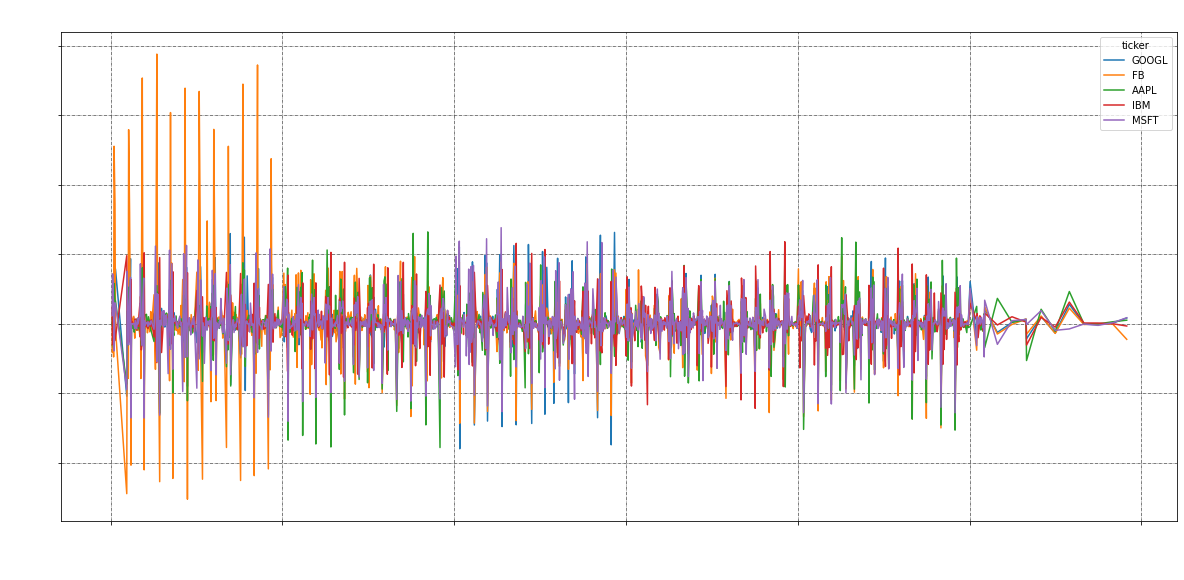

In [448]:
SP_500_daily_returns_by_ticker_5 = SP_500_daily_returns_by_ticker[['GOOGL', 'FB', 'AAPL', 'IBM', 'MSFT']]
SP_500_daily_returns_by_ticker_5.plot(figsize=(20, 10))
plt.title('S&P_500_Daily_Returns_by_Ticker_5', size=25, color='w')
plt.xlabel('Year', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Percent', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [449]:
# 'GOOGL', 'FB', 'AAPL', 'IBM', 'MSFT' - correlation of daily returns

SP_500_daily_returns_by_ticker_5_corr = SP_500_daily_returns_by_ticker_5.corr()
SP_500_daily_returns_by_ticker_5_corr

ticker,GOOGL,FB,AAPL,IBM,MSFT
ticker,,,,,
GOOGL,1.000000,0.470798,0.319545,-0.279062,0.609371
FB,0.470798,1.000000,0.485533,-0.303817,0.361512
AAPL,0.319545,0.485533,1.000000,-0.166689,0.566703
IBM,-0.279062,-0.303817,-0.166689,1.000000,-0.204359
MSFT,0.609371,0.361512,0.566703,-0.204359,1.000000


In [450]:
# Daily distribution of standard deviation by ticker level

SP_500_daily_returns_by_ticker_std = SP_500_daily_returns_by_ticker.std()
SP_500_daily_returns_by_ticker_std

ticker
A       0.066302
AAL     0.095608
AAP     0.100332
AAPL    0.065731
ABBV    0.068795
          ...   
XYL     0.061417
YUM     0.066052
ZBH     0.053838
ZION    0.069528
ZTS     0.055671
Length: 505, dtype: float64

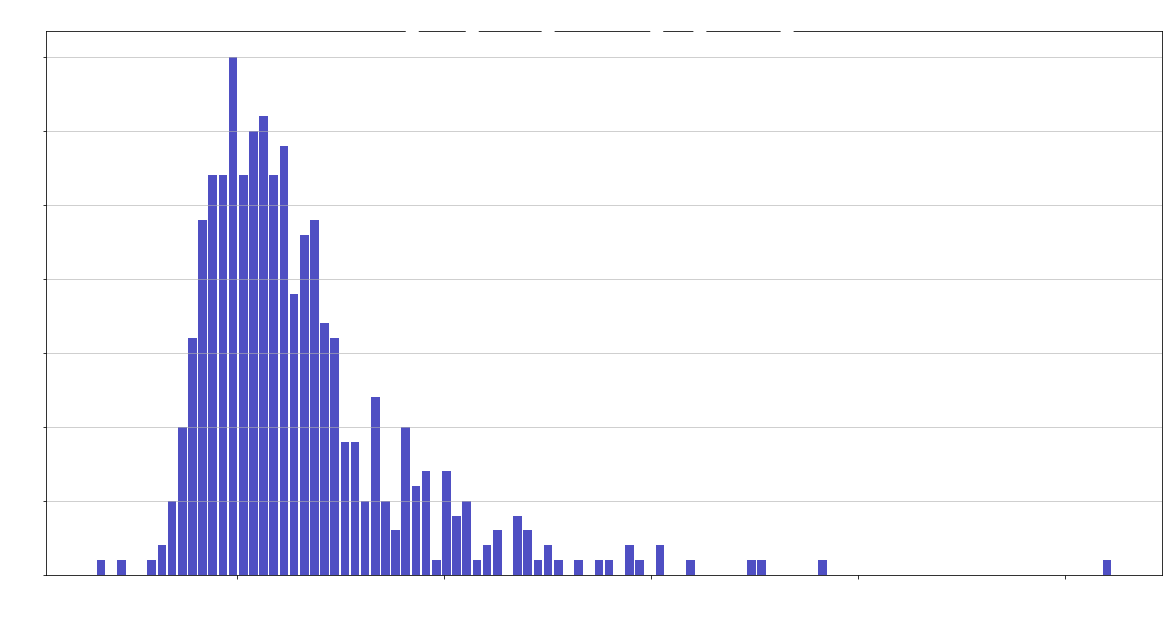

In [451]:
plt.figure(figsize=[20, 10])
n, bins, patches = plt.hist(SP_500_daily_returns_by_ticker_std, bins=100, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', size=20, color='w')
plt.ylabel('Frequency', size=20, color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylabel('Frequency', size=15, color='w')
plt.title('SP_500_Daily_Returns_by_Ticker_std', size=25, color='w')
plt.show()

# Calculations of monthly returns by Ticker.

In [452]:
SP_500_monthly_data_by_ticker = SP_500_daily_data_by_ticker.resample('BM').last()
SP_500_monthly_data_by_ticker

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANDV,...,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-31,51.10,22.44,99.91,74.2899,48.96,66.38,36.96,73.00,54.610,49.68,40.90,75.31,236.78,41.89,36.48,47.04,13.99,62.61,65.10,158.12,48.28,27.65,58.60,47.22,45.065,66.77,56.75,36.100,53.28,NaN,123.358,17.700,3.31,47.80,198.33,118.688,101.06,79.37,359.002,47.82,...,107.51,49.790,72.50,51.3095,83.55,41.00,53.67,89.97,67.98,54.19,67.36,65.54,50.49,100.58,60.52,69.85,42.37,42.67,147.06,NaN,43.69,35.52,77.07,NaN,17.48,30.34,66.80,167.70,102.92,28.92,30.32,45.28,89.82,47.15,40.08,33.22,68.48,87.89,28.42,31.84
2013-02-28,41.48,13.43,76.34,63.0571,36.92,47.20,33.79,74.36,39.310,45.22,31.86,61.36,158.69,36.72,33.79,46.79,11.62,47.19,49.95,85.16,38.01,29.62,41.99,38.48,36.960,65.08,31.44,25.775,46.02,43.14,86.740,13.705,2.49,41.83,146.23,91.550,68.63,77.60,264.270,56.24,...,90.55,39.660,70.63,38.3952,58.50,45.59,50.93,80.21,58.47,45.81,46.82,70.78,46.53,92.72,40.94,47.16,41.30,35.08,112.95,NaN,37.32,34.71,70.78,NaN,14.03,29.41,60.24,116.90,67.31,28.70,28.64,37.27,89.55,41.42,32.44,27.50,65.48,74.96,24.15,33.45
2013-03-29,41.97,16.97,82.65,63.2371,40.78,51.45,35.32,75.97,43.515,46.49,33.73,65.03,161.89,41.25,35.02,48.63,12.57,51.13,52.02,92.11,38.82,30.66,45.01,41.31,35.320,62.52,33.51,31.980,49.07,42.90,92.140,13.480,2.55,43.36,153.57,102.510,73.65,76.92,266.490,58.55,...,93.43,42.460,72.00,39.9405,61.48,45.49,51.70,83.64,61.62,47.27,54.97,73.20,49.15,93.91,47.68,50.29,42.89,36.99,118.46,NaN,39.21,37.46,74.83,NaN,15.04,31.38,64.48,125.16,75.44,29.70,30.30,38.17,90.11,42.44,34.40,27.56,71.94,75.22,24.99,33.40
2013-04-30,41.44,16.90,83.88,63.2542,46.05,54.12,36.92,81.44,45.080,43.99,33.94,67.34,171.77,39.38,36.25,51.43,13.86,57.44,54.44,105.73,41.42,31.11,47.54,42.45,43.910,61.25,33.12,30.820,49.26,41.83,98.000,14.510,2.82,40.71,155.68,104.210,74.53,83.99,253.810,53.40,...,91.29,42.115,65.14,42.4333,63.99,40.32,49.88,87.56,61.29,46.07,76.82,79.63,53.91,92.40,49.51,55.28,44.94,37.98,114.28,NaN,40.98,38.13,77.72,NaN,14.81,30.51,60.08,137.30,73.18,31.79,31.14,37.91,88.99,42.35,34.32,27.75,68.12,76.45,24.62,33.02
2013-05-31,45.45,17.57,81.52,64.2478,42.69,54.08,36.67,82.11,42.910,45.93,32.23,68.72,177.09,37.73,34.04,45.82,12.20,60.38,55.69,123.29,44.46,30.26,49.74,43.68,46.120,66.92,35.75,28.410,48.24,41.05,97.580,15.200,4.00,43.15,164.00,100.530,81.52,77.84,269.200,61.65,...,94.90,44.535,67.01,43.7762,65.89,40.63,53.58,79.95,58.82,47.04,80.33,71.37,48.48,96.71,47.76,63.32,40.81,40.55,127.76,NaN,41.93,35.18,74.84,NaN,16.38,29.82,58.12,135.89,70.14,28.72,31.43,40.65,90.47,41.76,35.16,28.14,67.75,78.51,28.07,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,70.05,52.13,111.39,174.3500,99.49,96.90,58.82,158.93,185.040,91.83,40.09,117.94,263.30,111.42,58.07,71.42,10.87,184.65,89.96,170.56,60.25,42.89,99.70,63.55,65.880,137.45,248.90,72.750,101.39,81.24,119.700,55.920,12.28,74.28,200.53,180.600,172.00,142.01,1246.870,115.99,...,132.82,119.340,111.40,77.3600,29.18,94.22,133.94,74.58,97.00,114.31,156.89,58.45,52.39,204.76,73.85,81.44,65.43,62.04,169.05,151.41,88.05,32.58,101.61,67.76,21.49,35.50,113.86,162.30,128.24,47.14,34.46,74.64,87.14,68.30,30.26,69.48,82.98,126.22,50.62,74.24
2018-09-28,71.77,52.08,110.49,174.3300,100.24,97.52,58.92,159.46,186.700,91.64,40.22,118.76,267.96,112.11,57.32,70.58,10.76,183.60,90.00,175.65,60.63,41.98,9

In [453]:
# Monthly returns by Ticker

SP_500_monthly_returns_by_ticker = SP_500_monthly_data_by_ticker.pct_change()
SP_500_monthly_returns_by_ticker

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANDV,...,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,-0.188258,-0.401515,-0.235912,-0.151202,-0.245915,-0.288942,-0.085768,0.018630,-0.280168,-0.089775,-0.221027,-0.185234,-0.329800,-0.123418,-0.073739,-0.005315,-0.169407,-0.246287,-0.232719,-0.461422,-0.212717,0.071248,-0.283447,-0.185091,-0.179851,-0.025311,-0.445991,-0.286011,-0.136261,NaN,-0.296843,-0.225706,-0.247734,-0.124895,-0.262693,-0.228650,-0.320898,-0.022301,-0.263876,0.176077,...,-0.157753,-0.203455,-0.025793,-0.251694,-0.299820,0.111951,-0.051053,-0.108481,-0.139894,-0.154641,-0.304929,0.079951,-0.078431,-0.078147,-0.323529,-0.324839,-0.025254,-0.177877,-0.231946,NaN,-0.145800,-0.022804,-0.081614,NaN,-0.197368,-0.030653,-0.098204,-0.302922,-0.345997,-0.007607,-0.055409,-0.176899,-0.003006,-0.121527,-0.190619,-0.172185,-0.043808,-0.147116,-0.150246,0.050565
2013-03-29,0.011813,0.263589,0.082657,0.002855,0.104550,0.090042,0.045280,0.021651,0.106970,0.028085,0.058694,0.059811,0.020165,0.123366,0.036401,0.039325,0.081756,0.083492,0.041441,0.081611,0.021310,0.035111,0.071922,0.073545,-0.044372,-0.039336,0.065840,0.240737,0.066276,-0.005563,0.062255,-0.016417,0.024096,0.036577,0.050195,0.119716,0.073146,-0.008763,0.008400,0.041074,...,0.031806,0.070600,0.019397,0.040247,0.050940,-0.002193,0.015119,0.042763,0.053874,0.031871,0.174071,0.034190,0.056308,0.012834,0.164631,0.066370,0.038499,0.054447,0.048783,NaN,0.050643,0.079228,0.057220,NaN,0.071989,0.066984,0.070385,0.070659,0.120784,0.034843,0.057961,0.024148,0.006253,0.024626,0.060419,0.002182,0.098656,0.003469,0.034783,-0.001495
2013-04-30,-0.012628,-0.004125,0.014882,0.000270,0.129230,0.051895,0.045300,0.072002,0.035965,-0.053775,0.006226,0.035522,0.061029,-0.045333,0.035123,0.057578,0.102625,0.123411,0.046521,0.147867,0.066976,0.014677,0.056210,0.027596,0.243205,-0.020313,-0.011638,-0.036273,0.003872,-0.024942,0.063599,0.076409,0.105882,-0.061116,0.013740,0.016584,0.011948,0.091914,-0.047582,-0.087959,...,-0.022905,-0.008125,-0.095278,0.062413,0.040826,-0.113651,-0.035203,0.046868,-0.005355,-0.025386,0.397490,0.087842,0.096846,-0.016079,0.038381,0.099224,0.047797,0.026764,-0.035286,NaN,0.045142,0.017886,0.038621,NaN,-0.015293,-0.027725,-0.068238,0.096996,-0.029958,0.070370,0.027723,-0.006812,-0.012429,-0.002121,-0.002326,0.006894,-0.053100,0.016352,-0.014806,-0.011377
2013-05-31,0.096766,0.039645,-0.028135,0.015708,-0.072964,-0.000739,-0.006771,0.008227,-0.048137,0.044101,-0.050383,0.020493,0.030972,-0.041899,-0.060966,-0.109080,-0.119769,0.051184,0.022961,0.166083,0.073394,-0.027322,0.046277,0.028975,0.050330,0.092571,0.079408,-0.078196,-0.020706,-0.018647,-0.004286,0.047553,0.418440,0.059936,0.053443,-0.035313,0.093788,-0.073223,0.060636,0.154494,...,0.039544,0.057462,0.028707,0.031647,0.029692,0.007688,0.074178,-0.086912,-0.040300,0.021055,0.045691,-0.103730,-0.100723,0.046645,-0.035346,0.145441,-0.091900,0.067667,0.117956,NaN,0.023182,-0.077367,-0.037056,NaN,0.106009,-0.022616,-0.032623,-0.010269,-0.041541,-0.096571,0.009313,0.072276,0.016631,-0.013932,0.024476,0.014054,-0.005432,0.026946,0.140130,-0.030890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

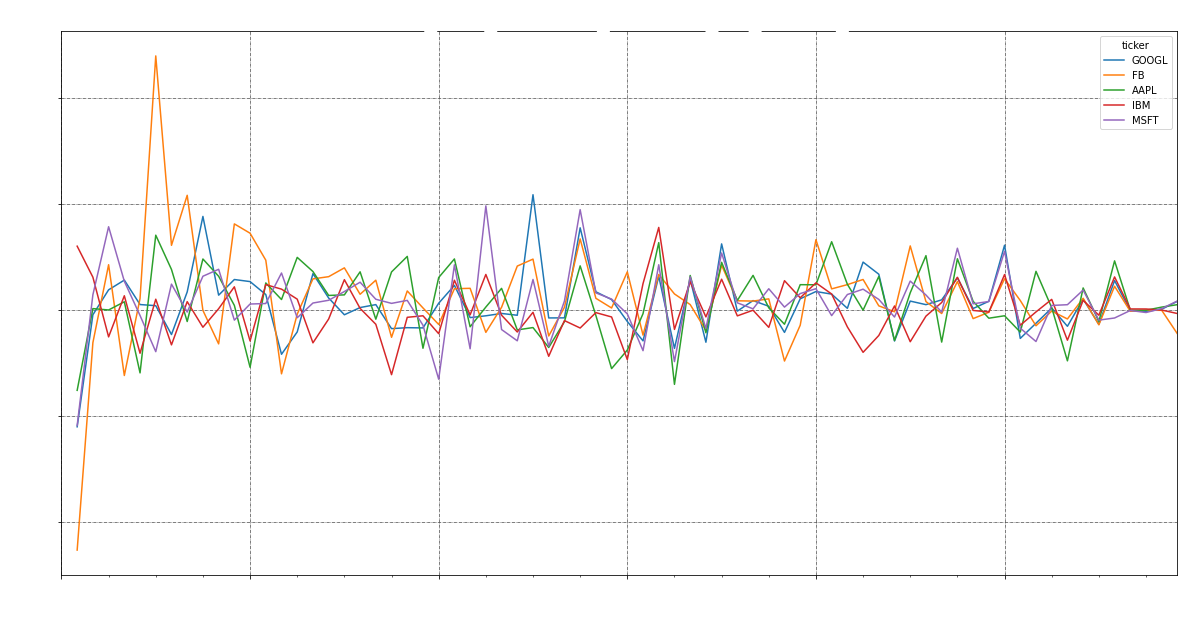

In [454]:
SP_500_monthly_returns_by_ticker_5 = SP_500_monthly_returns_by_ticker[['GOOGL', 'FB', 'AAPL', 'IBM', 'MSFT']]
SP_500_monthly_returns_by_ticker_5.plot(figsize=(20, 10))
plt.title('S&P_500_Monthly_Returns_by_Ticker_5', size=25, color='w')
plt.xlabel('Year', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Percent', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [455]:
# 'GOOGL', 'FB', 'AAPL', 'IBM', 'MSFT' - correlation of daily returns

SP_500_monthly_returns_by_ticker_5_corr = SP_500_monthly_returns_by_ticker_5.corr()
SP_500_monthly_returns_by_ticker_5_corr

ticker,GOOGL,FB,AAPL,IBM,MSFT
ticker,,,,,
GOOGL,1.000000,0.479908,0.379388,-0.027704,0.595068
FB,0.479908,1.000000,0.329498,-0.169816,0.244431
AAPL,0.379388,0.329498,1.000000,0.230254,0.373739
IBM,-0.027704,-0.169816,0.230254,1.000000,0.094885
MSFT,0.595068,0.244431,0.373739,0.094885,1.000000


In [456]:
# Monthly distribution of standard deviation.

SP_500_monthly_returns_by_ticker_std = SP_500_monthly_returns_by_ticker.std()
SP_500_monthly_returns_by_ticker_std

ticker
A       0.063542
AAL     0.111865
AAP     0.083956
AAPL    0.066178
ABBV    0.074158
          ...   
XYL     0.062724
YUM     0.063849
ZBH     0.055915
ZION    0.070079
ZTS     0.053560
Length: 505, dtype: float64

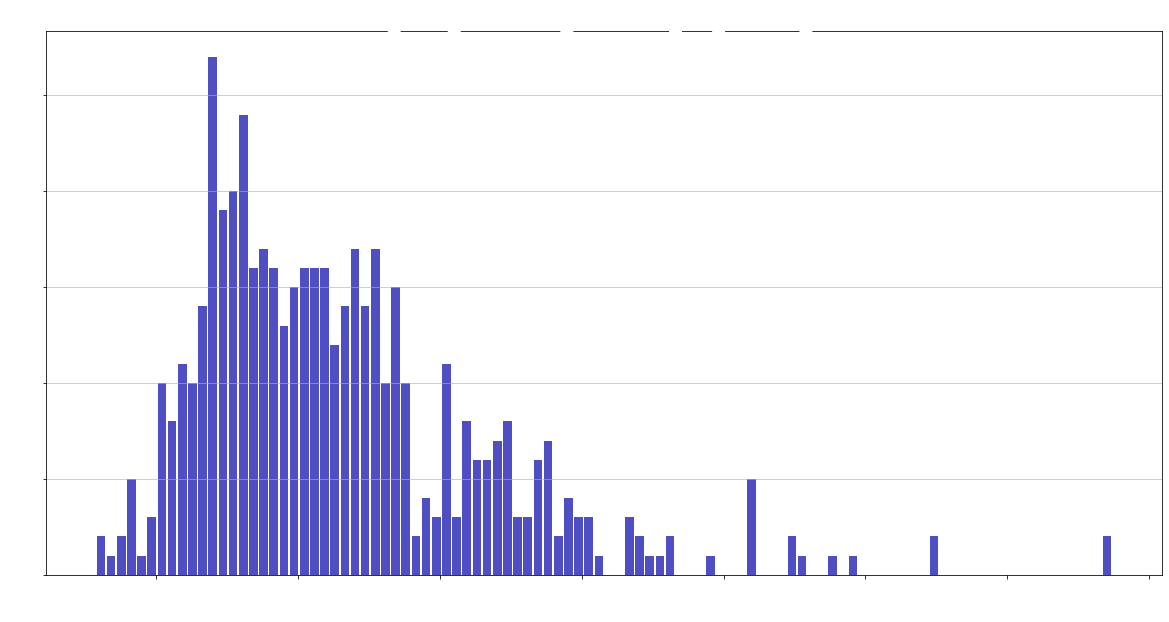

In [457]:
plt.figure(figsize=[20,10])
n, bins, patches = plt.hist(SP_500_monthly_returns_by_ticker_std, bins=100, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', size=20, color='w')
plt.ylabel('Frequency', size=20, color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylabel('Frequency', size=15, color='w')
plt.title('SP_500_Monthly_Returns_by_Ticker_std', size=25, color='w')
plt.show()

# Calculations of daily returns by Sector.

In [458]:
SP_500_daily_data_by_sector = cleanDataset_.pivot_table(values='close', index='date', columns='sector')
SP_500_daily_data_by_sector

sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
date,,,,,,,,,,,
2013-01-03,67.425250,111.102273,60.503656,51.574617,61.091129,48.545310,63.878246,60.098281,75.753846,48.223219,43.109821
2013-01-04,67.994200,113.715455,61.791647,54.200191,63.043710,50.388787,66.241127,61.507003,76.769615,48.543072,44.921786
2013-01-05,67.888900,115.580909,63.960224,55.279714,60.769032,51.192129,68.386042,61.111631,80.725769,48.257146,47.273393
2013-01-07,68.675800,129.008636,63.928029,53.540508,62.741774,54.364047,70.772387,63.867656,74.897308,49.576478,43.363571
2013-01-08,71.281300,136.659091,68.281804,56.018611,67.855968,58.386103,75.269815,68.496930,75.097308,53.538639,46.125714
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,116.497143,262.716364,103.010875,83.685676,65.787813,94.228421,139.365410,123.579444,105.709615,127.960984,60.733571
2018-09-01,116.293810,263.414545,103.057000,83.688378,65.544375,94.897895,140.989836,124.221875,104.369615,127.286393,60.112143
2018-10-01,115.499524,263.315455,102.767000,83.053514,65.473438,95.375263,140.830656,123.918458,102.598462,126.729836,59.420357


In [459]:
# Daily returns by Sector

SP_500_daily_returns_by_sector = SP_500_daily_data_by_sector.pct_change().dropna()
SP_500_daily_returns_by_sector

sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
date,,,,,,,,,,,
2013-01-04,0.008438,0.023521,0.021288,0.050908,0.031962,0.037974,0.036990,0.023440,0.013409,0.006633,0.042031
2013-01-05,-0.001549,0.016405,0.035095,0.019917,-0.036081,0.015943,0.032380,-0.006428,0.051533,-0.005890,0.052349
2013-01-07,0.011591,0.116176,-0.000503,-0.031462,0.032463,0.061961,0.034895,0.045098,-0.072201,0.027340,-0.082707
2013-01-08,0.037939,0.059302,0.068104,0.046285,0.081512,0.073984,0.063548,0.072482,0.002670,0.079920,0.063697
2013-01-10,0.031188,0.100114,0.014690,-0.038793,0.035481,-0.015015,0.031440,0.018213,-0.022366,0.019291,-0.057649
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,0.063970,-0.012108,-0.010304,0.034890,0.092418,0.002567,0.010266,0.012438,0.089924,0.038697,0.085456
2018-09-01,-0.001745,0.002658,0.000448,0.000032,-0.003700,0.007105,0.011656,0.005199,-0.012676,-0.005272,-0.010232
2018-10-01,-0.006830,-0.000376,-0.002814,-0.007586,-0.001082,0.005030,-0.001129,-0.002443,-0.016970,-0.004372,-0.011508


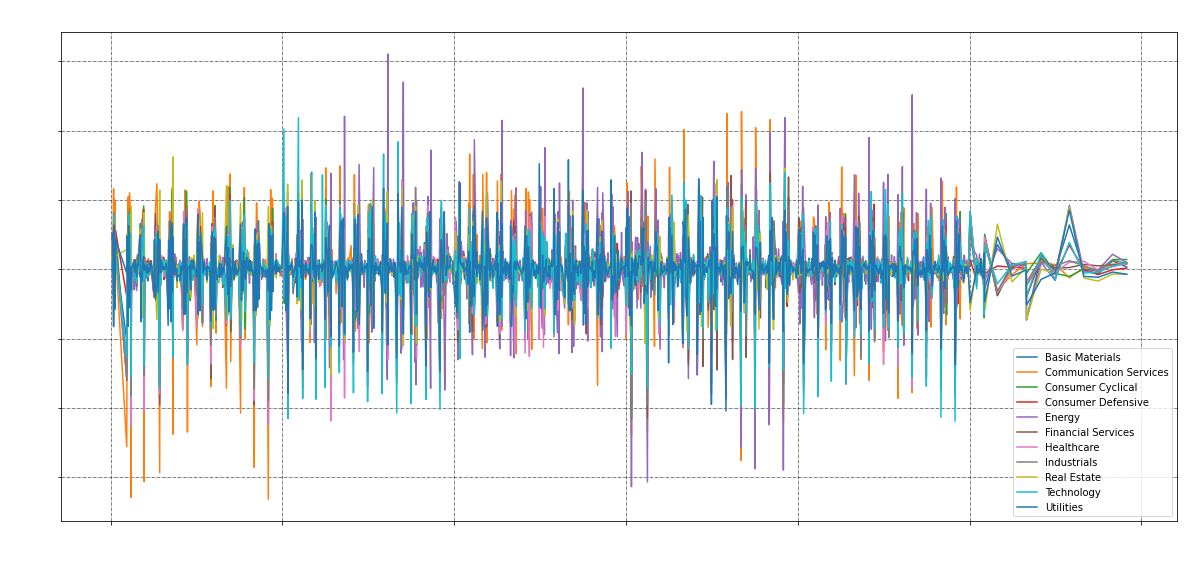

In [460]:
SP_500_daily_returns_by_sector.plot(figsize=(20, 10))
plt.title('S&P_500_Daily_Returns_by_Sector', size=25, color='w')
plt.xlabel('Year', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Percent', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend(loc='lower right',)
plt.show()

In [461]:
# correlation of daily returns

SP_500_daily_returns_by_sector_corr = SP_500_daily_returns_by_sector.corr()
SP_500_daily_returns_by_sector_corr

sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
sector,,,,,,,,,,,
Basic Materials,1.000000,0.611489,0.678734,0.504197,0.560104,0.753771,0.624127,0.859089,0.357261,0.707677,0.432304
Communication Services,0.611489,1.000000,0.707151,0.410863,0.332862,0.668117,0.636788,0.686602,0.119750,0.663347,0.143990
Consumer Cyclical,0.678734,0.707151,1.000000,0.708059,0.318165,0.778817,0.734400,0.788259,0.316589,0.688049,0.286139
Consumer Defensive,0.504197,0.410863,0.708059,1.000000,0.047925,0.478908,0.640999,0.594790,0.619449,0.577673,0.634983
Energy,0.560104,0.332862,0.318165,0.047925,1.000000,0.416815,0.067662,0.454751,0.035834,0.292343,0.092106
Financial Services,0.753771,0.668117,0.778817,0.478908,0.416815,1.000000,0.700160,0.916288,0.159838,0.692772,0.256381
Healthcare,0.624127,0.636788,0.734400,0.640999,0.067662,0.700160,1.000000,0.718301,0.391480,0.736083,0.365849
Industrials,0.859089,0.686602,0.788259,0.594790,0.454751,0.916288,0.718301,1.000000,0.300208,0.766675,0.465217
Real Estate,0.357261,0.119750,0.316589,0.619449,0.035834,0.159838,0.391480,0.300208,1.000000,0.388071,0.677586


In [462]:
# Daily distribution of standard deviation.

SP_500_daily_returns_by_sector_std = SP_500_daily_returns_by_sector.std().sort_values()
SP_500_daily_returns_by_sector_std

sector
Consumer Defensive        0.028552
Consumer Cyclical         0.032065
Real Estate               0.034762
Basic Materials           0.035965
Industrials               0.036080
Utilities                 0.036688
Financial Services        0.039459
Healthcare                0.041095
Technology                0.044270
Communication Services    0.054650
Energy                    0.055359
dtype: float64

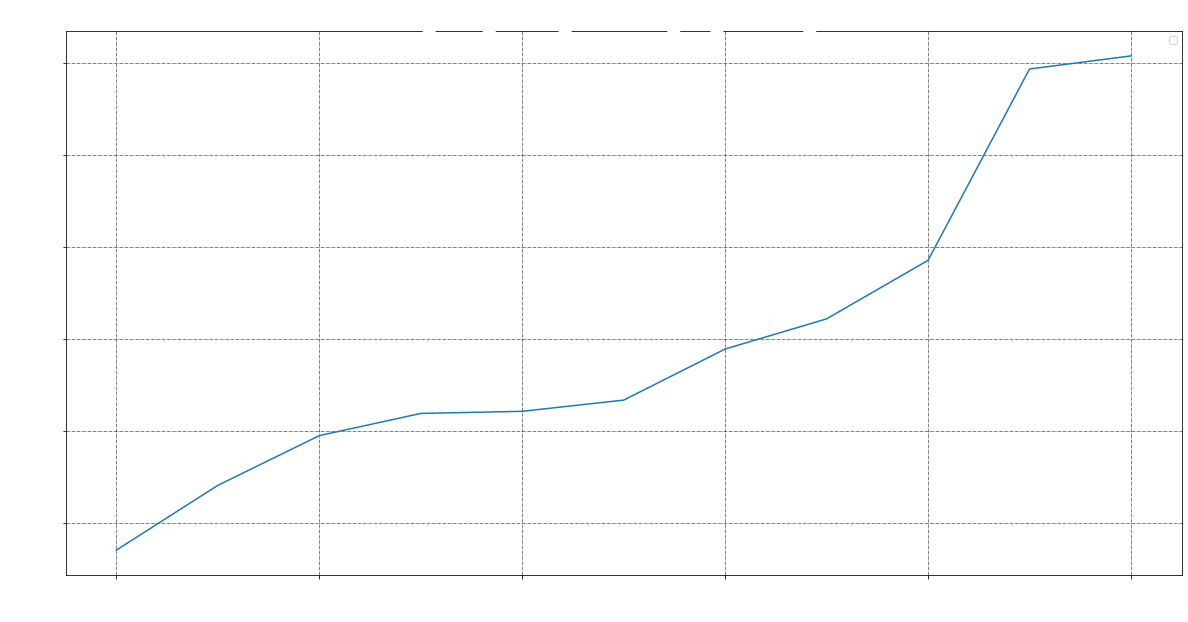

In [463]:
SP_500_daily_returns_by_sector_std.plot(figsize=(20, 10))
plt.title('SP_500_Daily_Returns_by_Sector_std', size=25, color='w')
plt.xlabel('Value', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Frequency', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend([])
plt.show()

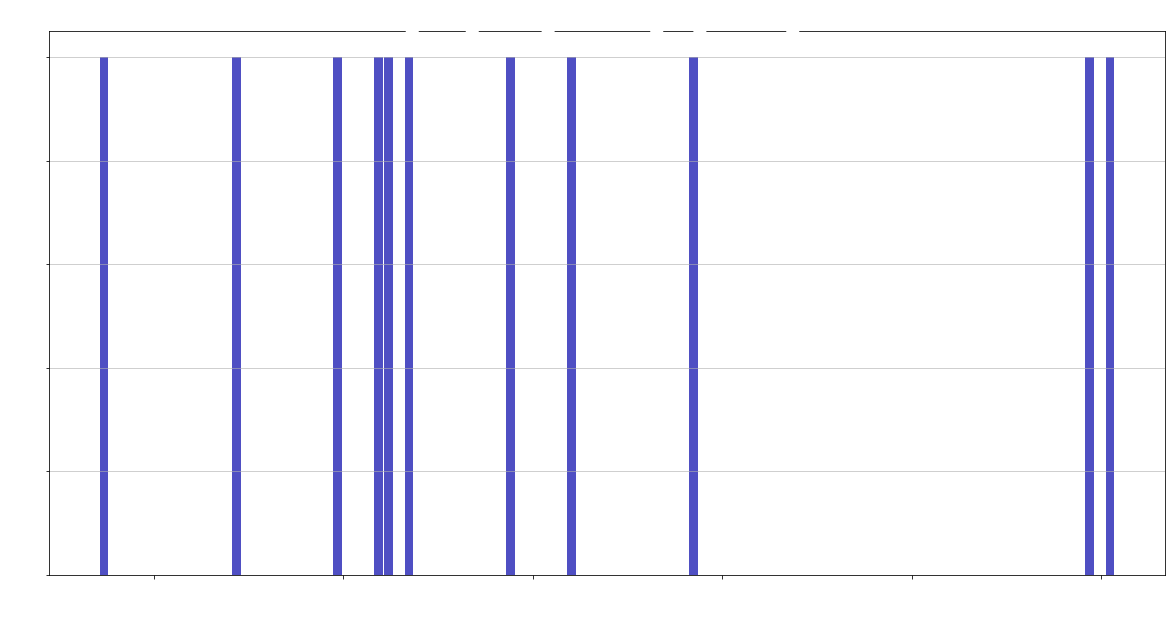

In [464]:
plt.figure(figsize=[20,10])
n, bins, patches = plt.hist(SP_500_daily_returns_by_sector_std, bins=100, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', size=20, color='w')
plt.ylabel('Frequency', size=20, color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylabel('Frequency', size=15, color='w')
plt.title('SP_500_Daily_Returns_by_Sector_std', size=25, color='w')
plt.show()

# Calculations of monthly returns by Sector.

In [465]:
SP_500_monthly_returns_by_sector = SP_500_daily_data_by_sector.resample('BM').last()
SP_500_monthly_returns_by_sector

sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
date,,,,,,,,,,,
2013-01-31,75.091150,154.462955,73.129222,56.863044,72.438387,60.239391,79.398290,72.584603,74.840615,55.844711,45.340000
2013-02-28,67.262800,110.204455,60.333583,51.276000,61.266290,48.510990,63.280054,60.221410,75.443077,47.981735,43.000893
2013-03-29,68.694200,113.007455,62.354044,54.274523,63.288065,50.804751,66.134522,62.360551,76.600385,48.931967,45.024286
2013-04-30,69.101600,115.895455,64.449614,55.555000,61.929032,51.800104,68.560788,62.031751,81.160000,48.765102,47.665893
2013-05-31,71.488850,124.637500,65.645356,54.088931,63.755161,54.433243,70.970470,64.638591,76.583077,50.442415,43.568929
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,116.497143,262.716364,103.010875,83.685676,65.787813,94.228421,139.365410,123.579444,105.709615,127.960984,60.733571
2018-09-28,116.293810,263.414545,103.057000,83.688378,65.544375,94.897895,140.989836,124.221875,104.369615,127.286393,60.112143
2018-10-31,115.499524,263.315455,102.767000,83.053514,65.473438,95.375263,140.830656,123.918458,102.598462,126.729836,59.420357


In [466]:
# Monthly returns by Sector

SP_500_monthly_returns_by_sector = SP_500_monthly_returns_by_sector.pct_change().dropna()
SP_500_monthly_returns_by_sector

sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
date,,,,,,,,,,,
2013-02-28,-0.104251,-0.286531,-0.174973,-0.098254,-0.154229,-0.194697,-0.203005,-0.170328,0.008050,-0.140801,-0.051590
2013-03-29,0.021281,0.025435,0.033488,0.058478,0.033000,0.047283,0.045108,0.035521,0.015340,0.019804,0.047055
2013-04-30,0.005931,0.025556,0.033608,0.023593,-0.021474,0.019592,0.036687,-0.005273,0.059525,-0.003410,0.058671
2013-05-31,0.034547,0.075430,0.018553,-0.026389,0.029487,0.050833,0.035147,0.042024,-0.056394,0.034396,-0.085952
2013-06-28,-0.049429,0.026158,-0.033708,-0.018290,-0.023072,-0.007593,-0.011630,-0.020648,-0.019366,-0.023739,0.009312
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,0.063970,-0.012108,-0.010304,0.034890,0.092418,0.002567,0.010266,0.012438,0.089924,0.038697,0.085456
2018-09-28,-0.001745,0.002658,0.000448,0.000032,-0.003700,0.007105,0.011656,0.005199,-0.012676,-0.005272,-0.010232
2018-10-31,-0.006830,-0.000376,-0.002814,-0.007586,-0.001082,0.005030,-0.001129,-0.002443,-0.016970,-0.004372,-0.011508


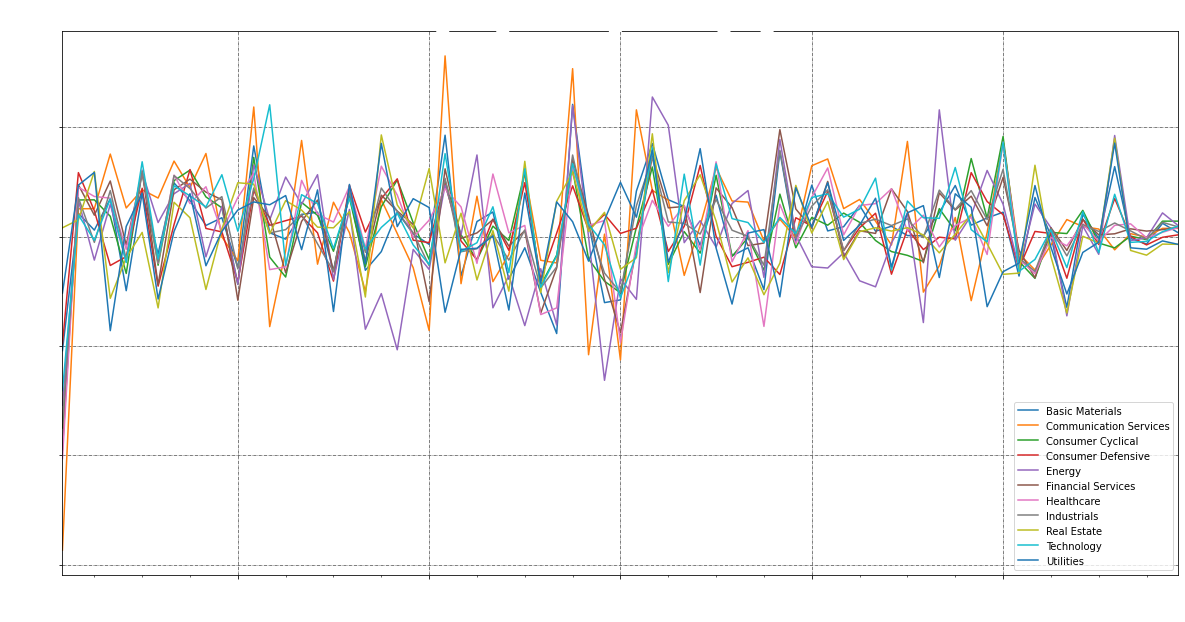

In [467]:
SP_500_monthly_returns_by_sector.plot(figsize=(20, 10))
plt.title('S&P_500_Monthly_Returns_by_Sector', size=25, color='w')
plt.xlabel('Year', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Close_Price', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend(loc='lower right')
plt.show()

In [468]:
# correlation of monthly returns

SP_500_monthly_returns_by_sector_corr = SP_500_monthly_returns_by_sector.corr()
SP_500_monthly_returns_by_sector_corr

sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
sector,,,,,,,,,,,
Basic Materials,1.000000,0.582041,0.679972,0.513388,0.686192,0.724378,0.641674,0.800813,0.286321,0.673659,0.159738
Communication Services,0.582041,1.000000,0.679180,0.408466,0.394947,0.641761,0.657125,0.702489,-0.001629,0.554327,-0.016894
Consumer Cyclical,0.679972,0.679180,1.000000,0.669213,0.442365,0.830097,0.792853,0.869945,0.188853,0.735088,0.141394
Consumer Defensive,0.513388,0.408466,0.669213,1.000000,0.273750,0.520041,0.535258,0.630086,0.522429,0.560707,0.581685
Energy,0.686192,0.394947,0.442365,0.273750,1.000000,0.586391,0.311146,0.606733,0.096149,0.402731,0.042235
Financial Services,0.724378,0.641761,0.830097,0.520041,0.586391,1.000000,0.768730,0.921235,0.086337,0.737711,0.061783
Healthcare,0.641674,0.657125,0.792853,0.535258,0.311146,0.768730,1.000000,0.795960,0.271819,0.679845,0.158315
Industrials,0.800813,0.702489,0.869945,0.630086,0.606733,0.921235,0.795960,1.000000,0.175812,0.757676,0.162913
Real Estate,0.286321,-0.001629,0.188853,0.522429,0.096149,0.086337,0.271819,0.175812,1.000000,0.240324,0.738997


In [469]:
# Monthly distribution of standard deviation.

SP_500_monthly_returns_by_sector_std = SP_500_monthly_returns_by_sector.std().sort_values()
SP_500_monthly_returns_by_sector_std

sector
Consumer Defensive        0.030301
Industrials               0.036351
Real Estate               0.037935
Consumer Cyclical         0.039443
Technology                0.039889
Utilities                 0.040069
Basic Materials           0.040341
Financial Services        0.043113
Healthcare                0.043504
Energy                    0.056344
Communication Services    0.063833
dtype: float64

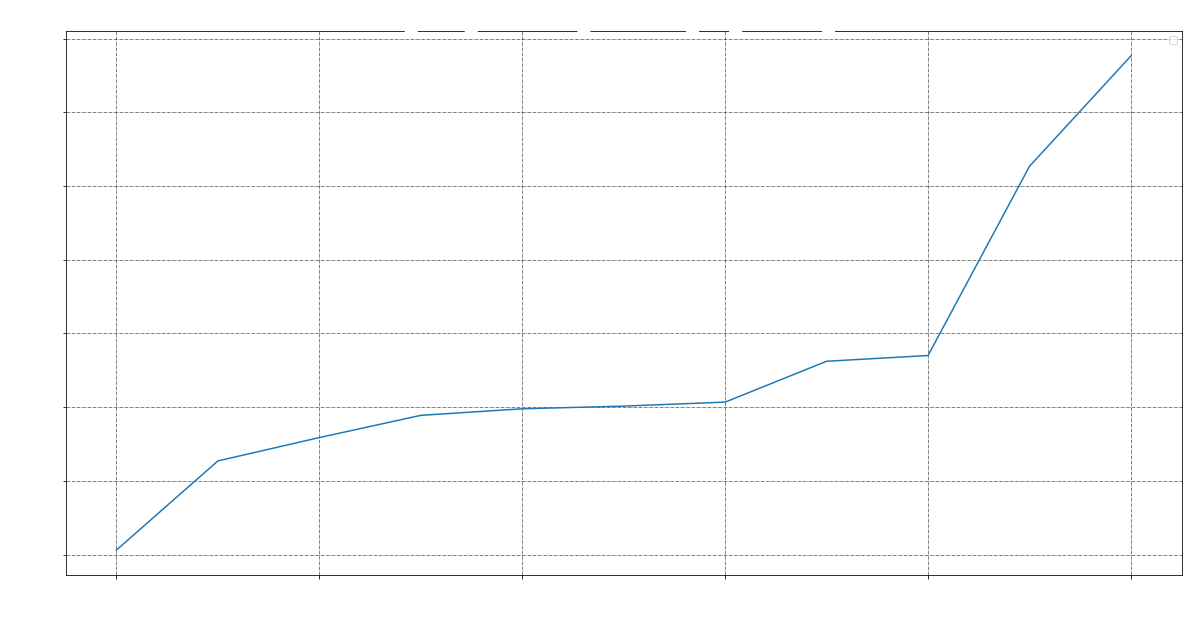

In [470]:
SP_500_monthly_returns_by_sector_std.plot(figsize=(20, 10))
plt.title('SP_500_Monthly_Returns_by_Sector_std', size=25, color='w')
plt.xlabel('Value', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Frequency', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend([])
plt.show()

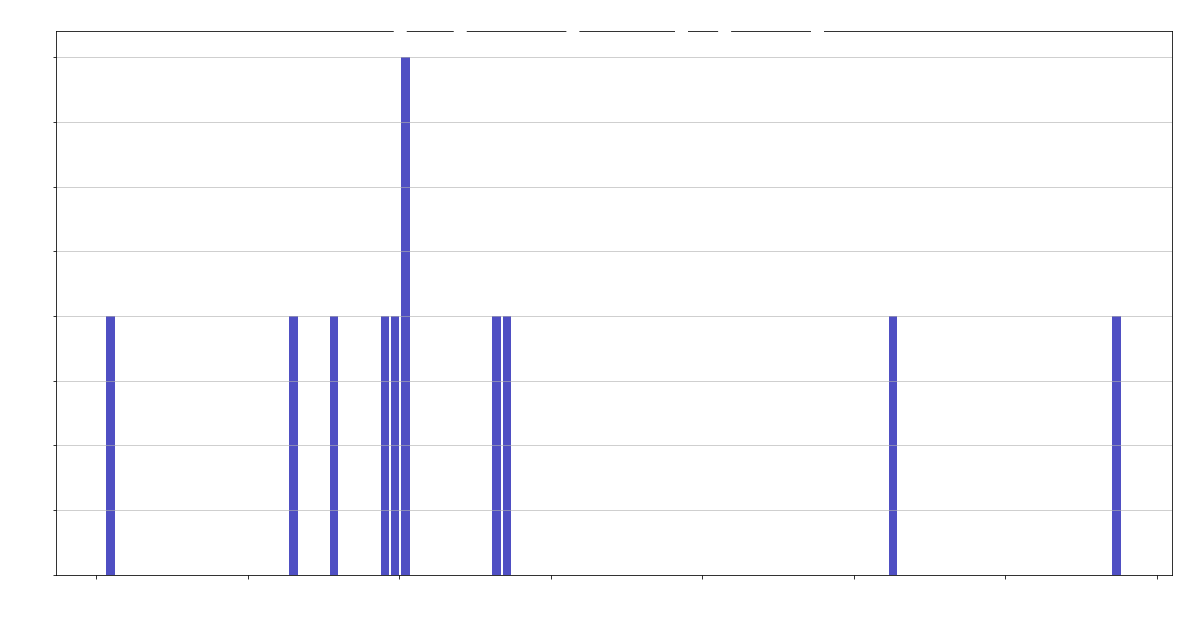

In [471]:
plt.figure(figsize=[20,10])
n, bins, patches = plt.hist(SP_500_monthly_returns_by_sector_std, bins=100, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', size=20, color='w')
plt.ylabel('Frequency', size=20, color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylabel('Frequency', size=15, color='w')
plt.title('SP_500_Monthly_Returns_by_Sector_std', size=25, color='w')
plt.show()

# Conclusion:

In [0]:
# make colorful histogram
# look for graph for correlation
# maybe can make a list of tech companies in ticker level

In [0]:
# https://matplotlib.org/3.1.1/api/pyplot_summary.html
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist
# https://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker
# https://matplotlib.org/api/dates_api.html#module-matplotlib.dates
# https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

# https://realpython.com/python-histograms/
# https://python-graph-gallery.com/histogram/
# https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c
# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0